In [1]:
import os
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
# os.enviorn['PYTHONHASHSEED'] = '0'


Bad key "text.kerning_factor" on line 4 in
C:\Users\44nas\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
x = np.linspace(0,10)


In [3]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    
set_seeds()

In [4]:
y = x + np.random.standard_normal(len(x))

In [5]:
reg = np.polyfit(x, y, deg=1)

In [6]:
reg

array([0.94612934, 0.22855261])

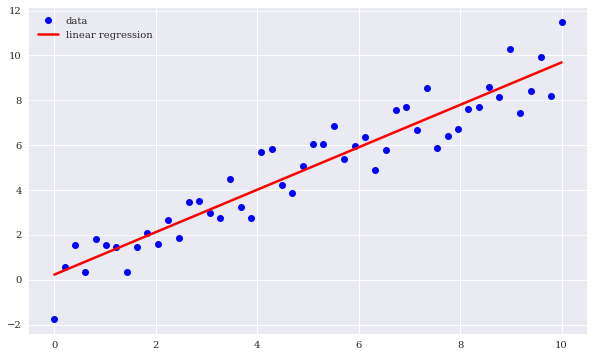

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
plt.plot(x, np.polyval(reg, x), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0 )

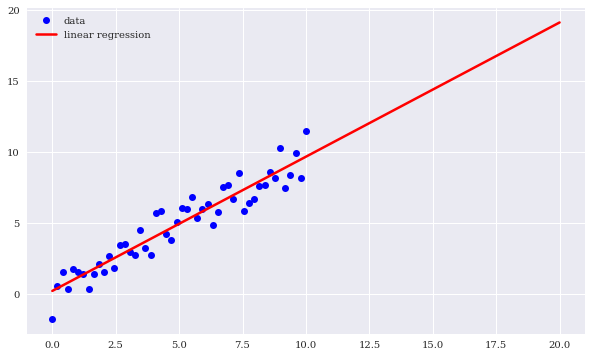

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'bo', label='data')
xn = np.linspace(0, 20)
plt.plot(xn, np.polyval(reg, xn), 'r', lw=2.5, label='linear regression')
plt.legend(loc=0 );

In [9]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [10]:
lags = 3

In [11]:
m = np.zeros((lags + 1, len(x) -lags))

In [12]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [13]:
m.T

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.],
       [ 8.,  9., 10., 11.]])

In [14]:
reg = np.linalg.lstsq(m[:lags].T, m[lags], rcond=None)[0]
reg

array([-0.66666667,  0.33333333,  1.33333333])

In [15]:
np.dot(m[:lags].T, reg)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

# Predicting Index Levels

In [16]:
import pandas as pd

In [17]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv', 
                  index_col= 0, parse_dates=True).dropna()
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
AAPL.O    2516 non-null float64
MSFT.O    2516 non-null float64
INTC.O    2516 non-null float64
AMZN.O    2516 non-null float64
GS.N      2516 non-null float64
SPY       2516 non-null float64
.SPX      2516 non-null float64
.VIX      2516 non-null float64
EUR=      2516 non-null float64
XAU=      2516 non-null float64
GDX       2516 non-null float64
GLD       2516 non-null float64
dtypes: float64(12)
memory usage: 255.5 KB


In [18]:
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82
2010-01-08,30.282827,30.660,20.83,133.52,174.31,114.57,1144.98,18.13,1.4412,1136.10,49.84,111.37


In [19]:
symbol = 'EUR='

In [20]:
data = pd.DataFrame(raw[symbol])

data.rename(columns = {symbol: 'price'}, inplace=True)

data.head()

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [21]:
lags = 5

In [22]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['price'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [23]:
reg = np.linalg.lstsq(data[cols], data['price'], rcond=None)[0]
reg

array([ 0.98635864,  0.02292172, -0.04769849,  0.05037365, -0.01208135])

In [24]:
data['prediction'] = np.dot(data[cols], reg)


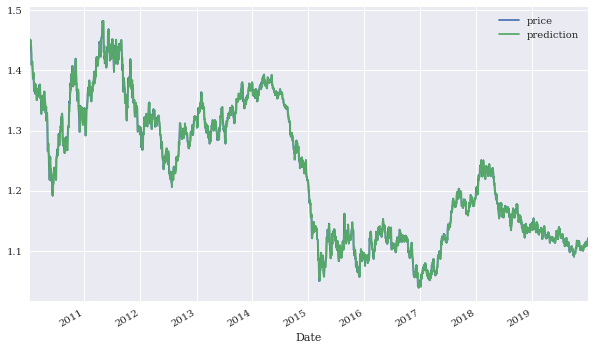

In [25]:
data[ [ 'price', 'prediction'] ].plot(figsize=(10, 6))

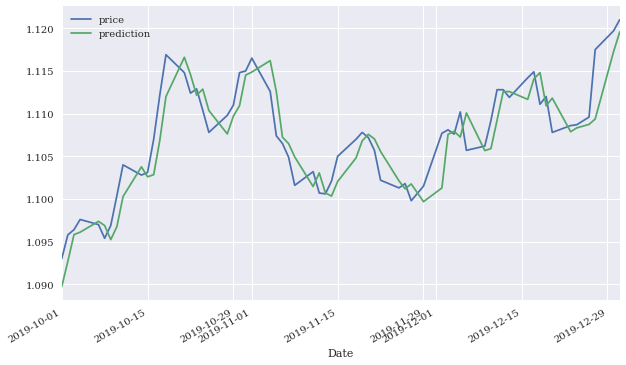

In [26]:
data[['price', 'prediction']].loc['2019-10-1':].plot(figsize=(10, 6))

# ========= 
# Perdicting Furtre Returns  #1
# =========  

In [27]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [28]:
data.dropna(inplace=True)

In [29]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)
data.dropna(inplace=True)

In [30]:
reg = np.linalg.lstsq(data[cols], data['return'], rcond=None)[0]
reg

array([-0.015689  ,  0.00890227, -0.03634858,  0.01290924, -0.00636023])

In [31]:
data['prediction'] = np.dot(data[cols], reg)

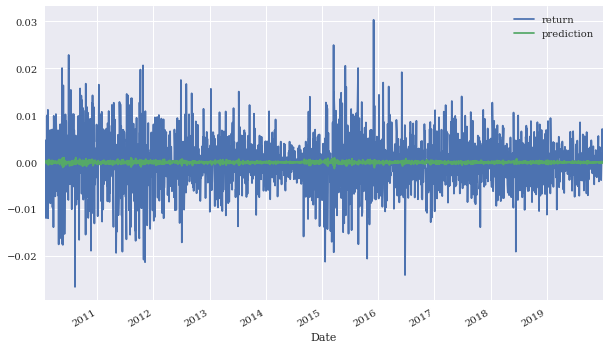

In [32]:
# Orginal
data[[ 'return', 'prediction']].iloc[lags:].plot(figsize=(10, 6))
# something wrog with perdictions

# data[[ 'return']].iloc[lags:].plot(figsize=(10, 6))

In [33]:
hits = np.sign(data['return'] * data['prediction']).value_counts()

In [34]:
hits.values[0] / sum(hits)

0.499001996007984

In [35]:
reg = np.linalg.lstsq(data[cols], np.sign(data['return']),  rcond=None)[0]
reg

array([-5.11938725, -2.24077248, -5.13080606, -3.03753232, -2.14819119])

In [36]:
data['prediction'] = np.sign(np.dot(data[cols], reg))

In [37]:
data['prediction'].value_counts()

 1.0    1300
-1.0    1205
Name: prediction, dtype: int64

In [38]:
hits = np.sign(data['return'] * data['prediction']).value_counts()
hits

 1.0    1301
-1.0    1191
 0.0      13
dtype: int64

In [39]:
hits.values[0] / sum(hits)

0.5193612774451097

### Vectorized Backtesting of Regression-Based Strategy

In [40]:
data.head()

,price,lag_1,lag_2,lag_3,lag_4,lag_5,prediction,return
Date,,,,,,,,
2010-01-20,1.4101,-0.005858,-0.008309,-0.000551,0.001103,-0.001310,1.0,-0.013874
2010-01-21,1.4090,-0.013874,-0.005858,-0.008309,-0.000551,0.001103,1.0,-0.000780
2010-01-22,1.4137,-0.000780,-0.013874,-0.005858,-0.008309,-0.000551,1.0,0.003330
2010-01-25,1.4150,0.003330,-0.000780,-0.013874,-0.005858,-0.008309,1.0,0.000919
2010-01-26,1.4073,0.000919,0.003330,-0.000780,-0.013874,-0.005858,1.0,-0.005457


In [41]:
data['strategy'] = data['prediction'] * data['return']

data[['return', 'strategy']].sum().apply(np.exp)

return      0.784026
strategy    1.654154
dtype: float64

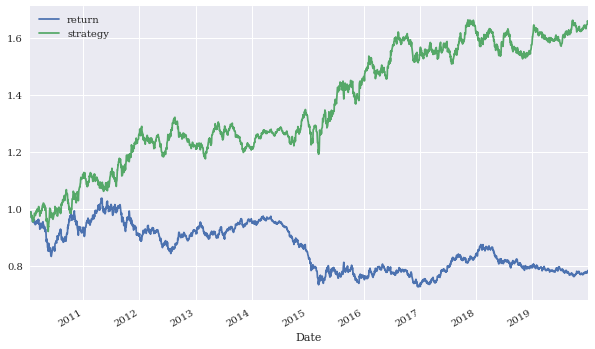

In [42]:
data[['return', 'strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10, 6))

# ========= 
# Using Machine Learning for Market Movement Prediction
# ========= 

In [43]:
x = np.arange(12)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [44]:
lags = 3

In [45]:
m = np.zeros((lags + 1, len(x) - lags))

In [46]:
m[lags] = x[lags:]
for i in range(lags):
    m[i] = x[i:i - lags]

In [47]:
from sklearn import linear_model

In [48]:
lm = linear_model.LinearRegression()

lm.fit(m[:lags].T, m[lags])


LinearRegression()

In [49]:
lm.coef_

array([0.33333333, 0.33333333, 0.33333333])

In [50]:
lm.intercept_

2.0000000000000018

In [51]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [52]:
lm = linear_model.LinearRegression(fit_intercept=False)

In [53]:
lm.fit(m[:lags].T, m[lags])

LinearRegression(fit_intercept=False)

In [54]:
lm.coef_

array([-0.66666667,  0.33333333,  1.33333333])

In [55]:
lm.intercept_

0.0

In [56]:
lm.predict(m[:lags].T)

array([ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [57]:
hours = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0,
                 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25,
                 4.5, 4.75, 5.0, 5.5])

In [58]:
success = np.array([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 1, 1, 1, 1, 1])

(-0.2, 1.2)

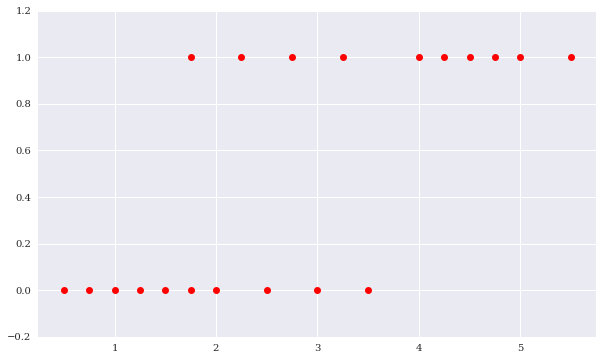

In [59]:
plt.figure(figsize=(10,6))
plt.plot(hours, success, 'ro' )
plt.ylim(-0.2, 1.2)

In [60]:
reg = np.polyfit(hours, success, deg=1)

(-0.2, 1.2)

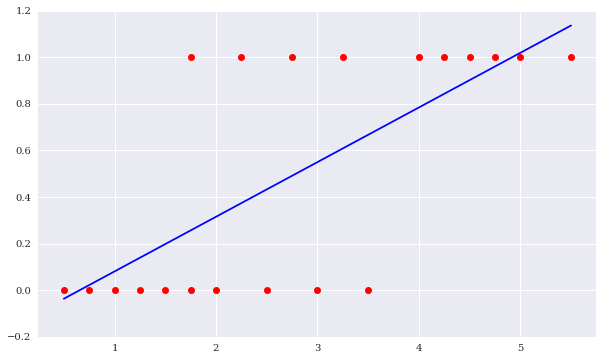

In [61]:
plt.figure(figsize=(10,6))
plt.plot(hours, success, 'ro' )
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2)

In [62]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [63]:
hrs = hours.reshape(1, -1).T

In [64]:
lm.fit(hrs, success)

LogisticRegression()

In [65]:
prediction = lm.predict(hrs)

(-0.2, 1.2)

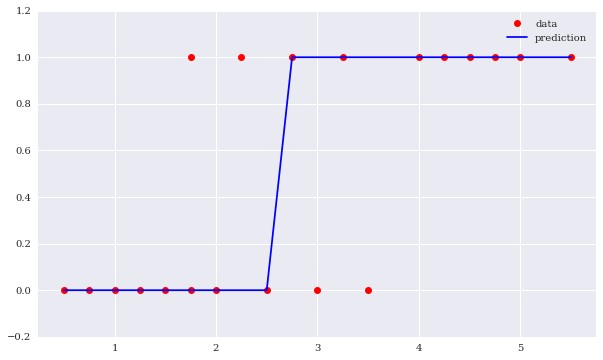

In [66]:
plt.figure(figsize=(10,6))
plt.plot(hours, success, 'ro', label='data' )
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc =0)
plt.ylim(-0.2, 1.2)

In [67]:
prob = lm.predict_proba(hrs)

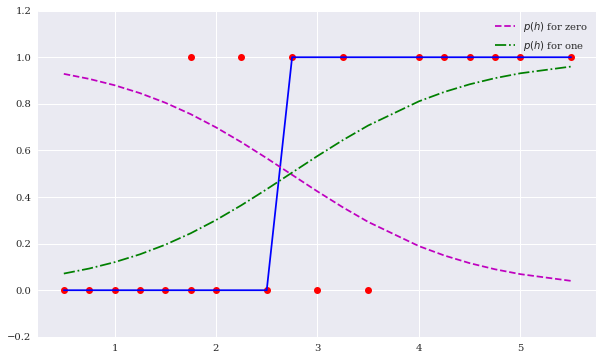

In [68]:
plt.figure(figsize=(10,6))
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b')
plt.plot(hours, prob.T[0], 'm--',
        label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g-.',
        label='$p(h)$ for one')

plt.ylim(-0.2, 1.2)
plt.legend(loc =0)

# Using Logistic Regression to Predict Market Direction

In [69]:
symbol = 'GLD'

In [70]:
data = pd.DataFrame(raw[symbol])

In [71]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [72]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [73]:
data.dropna(inplace=True)

In [74]:
lags = 3

In [75]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_{}'.format(lag)
    data[col] = data['return'].shift(lag)
    cols.append(col)

In [76]:
data.dropna(inplace=True)

In [77]:
from sklearn.metrics import accuracy_score

In [171]:
lm = linear_model.LogisticRegression(C=1e7, solver='lbfgs',
                                    multi_class='auto',
                                    max_iter=1000)

In [79]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [80]:
data['prediction'] = lm.predict(data[cols])

In [81]:
data['prediction'].value_counts() 

 1.0    1983
-1.0     529
Name: prediction, dtype: int64

In [82]:
hits = np.sign(data['return'].iloc[lags:] *
              data['prediction'].iloc[lags:]).value_counts()

In [83]:
hits

 1.0    1338
-1.0    1159
 0.0      12
dtype: int64

In [84]:
accuracy_score(data['prediction'],
              np.sign(data['return']))

0.5338375796178344

In [85]:
data['strategy'] = data['prediction'] * data['return']

In [86]:
data[['return','strategy']].sum().apply(np.exp)

return      1.289478
strategy    2.458716
dtype: float64

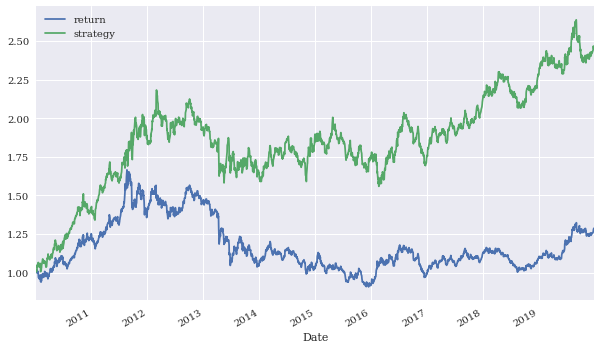

In [87]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [88]:
data = pd.DataFrame(raw[symbol])

In [89]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [90]:
data['return'] = np.log(data['price'] / data['price'].shift(1))

In [91]:
lags = 5

In [92]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    data[col] = data['price'].shift(lag)
    cols.append(col)

In [93]:
data.dropna(inplace=True)

In [94]:
lm.fit(data[cols], np.sign(data['return']))

LogisticRegression(C=10000000.0, max_iter=1000)

In [95]:
data['prediction'] = lm.predict(data[cols])

In [96]:
data['prediction'].value_counts()

 1.0    2048
-1.0     463
Name: prediction, dtype: int64

In [97]:
hits = np.sign(data['return'].iloc[lags:] *
              data['prediction'].iloc[lags:]).value_counts()

In [98]:
hits

 1.0    1330
-1.0    1164
 0.0      12
dtype: int64

In [99]:
accuracy_score(data['prediction'],
              np.sign(data['return']))

0.5308641975308642

In [100]:
data['strategy'] = data['prediction'] * data['return']

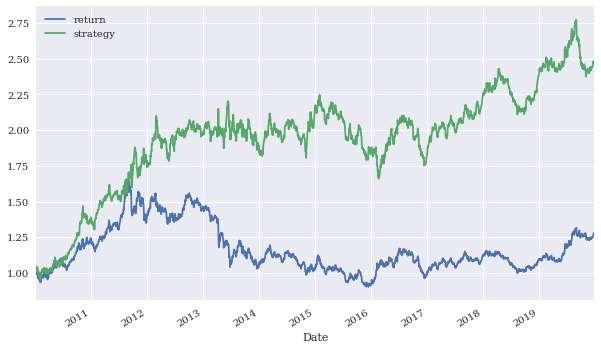

In [101]:
data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

# Using Deep Learning for Market Movement Prediction

In [102]:
hours = np.array([0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 1.75, 2.0,
                 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 4.0, 4.25,
                 4.5, 4.75, 5.0, 5.5])

In [103]:
success = np.array([ 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
                   0, 1, 1, 1, 1, 1, 1])

In [104]:
data = pd.DataFrame({'hours': hours, 'success': success})

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
hours      20 non-null float64
success    20 non-null int32
dtypes: float64(1), int32(1)
memory usage: 320.0 bytes


In [106]:
from sklearn.neural_network import MLPClassifier

In [107]:
model = MLPClassifier(hidden_layer_sizes=[32],
                     max_iter=1000, random_state=100)

In [108]:
model.fit(data['hours'].values.reshape(-1, 1), data['success'])

MLPClassifier(hidden_layer_sizes=[32], max_iter=1000, random_state=100)

In [109]:
data['prediction'] = model.predict(data['hours'].values.reshape(-1, 1))

In [110]:
data.tail()

,hours,success,prediction
15,4.25,1,1
16,4.50,1,1
17,4.75,1,1
18,5.00,1,1
19,5.50,1,1


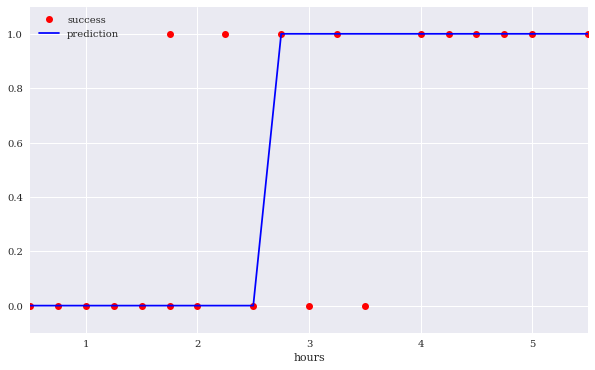

In [111]:
data.plot(x='hours', y=['success', 'prediction'],
         style=['ro', 'b-'], ylim=[-.1, 1.1],
         figsize=(10, 6))

# Deep Neural Networks to Predict Market Direction

In [112]:
symbol = 'EUR='

In [113]:
data = pd.DataFrame(raw[symbol])

In [114]:
data.rename(columns={symbol: 'price'}, inplace=True)

In [115]:
data['return'] = np.log(data['price'] / 
                        data['price'].shift(1))

In [116]:
data['direction'] = np.where(data['return'] > 0, 1, 0)

In [117]:
lags = 5

In [118]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['return'].shift(lag)
    cols.append(col)

data.dropna(inplace=True)

In [119]:
data.round(4).tail()

,price,return,direction,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,
2019-12-24,1.1087,0.0001,1,0.0007,-0.0038,0.0008,-0.0034,0.0006
2019-12-26,1.1096,0.0008,1,0.0001,0.0007,-0.0038,0.0008,-0.0034
2019-12-27,1.1175,0.0071,1,0.0008,0.0001,0.0007,-0.0038,0.0008
2019-12-30,1.1197,0.0020,1,0.0071,0.0008,0.0001,0.0007,-0.0038
2019-12-31,1.1210,0.0012,1,0.0020,0.0071,0.0008,0.0001,0.0007


In [120]:
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, RMSprop 


In [121]:
optimizer = Adam(learning_rate=0.0001)

In [122]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(100)

In [123]:
set_seeds()
model = Sequential()
model.add(Dense(64, activation='relu',
               input_shape=(lags,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [124]:
cutoff = '2017-12-31'

In [173]:
training_data = data[data.index < cutoff].copy()
# training_data.head()

In [126]:
mu, std = training_data.mean(), training_data.std()

In [127]:
training_data_ = (training_data - mu) / std
training_data_.head()

In [128]:
test_data = data[data.index >= cutoff].copy()
test_data.head()

In [129]:
test_data_ = (test_data - mu) / std
test_data_.head()

In [130]:
%%time
model.fit(training_data[cols],
         training_data['direction'],
         epochs=50, verbose=False,
         validation_split=0.2, shuffle=False)

Wall time: 4.14 s


In [131]:
res = pd.DataFrame(model.history.history)

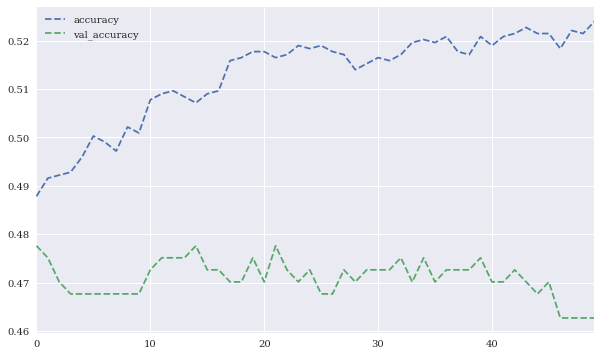

In [132]:
res[['accuracy', 'val_accuracy']].plot(figsize=(10, 6), style='--')

In [133]:
model.evaluate(training_data_[cols],
              training_data['direction'])

63/63 [==============================] - 0s 1ms/step - loss: 0.7555 - accuracy: 0.5157


[0.755477786064148, 0.5156950950622559]

In [134]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)
pred[:30].flatten()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0])

In [135]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [136]:
training_data['strategy'] = (training_data['prediction'] * training_data['return'])

In [137]:
training_data[['return','strategy']].sum().apply(np.exp)

return      0.826569
strategy    1.289555
dtype: float64

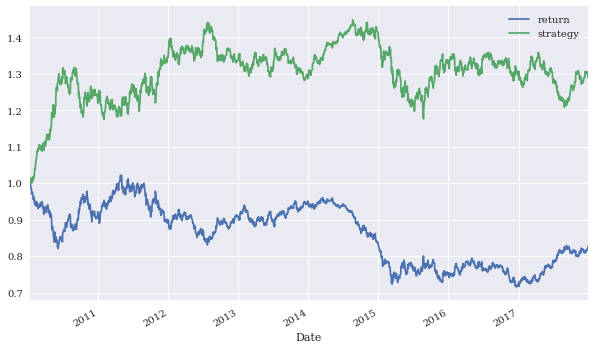

In [138]:
training_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [139]:
model.evaluate(test_data_[cols], test_data['direction'])

16/16 [==============================] - 0s 797us/step - loss: 0.7291 - accuracy: 0.5050


[0.7291157245635986, 0.5049701929092407]

In [140]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [141]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [142]:
test_data['prediction'].value_counts()

-1    368
 1    135
Name: prediction, dtype: int64

In [143]:
test_data['strategy'] =  (test_data['prediction'] * test_data['return'])

In [144]:
test_data[['return','strategy']].sum().apply(np.exp)

return      0.934478
strategy    1.109065
dtype: float64

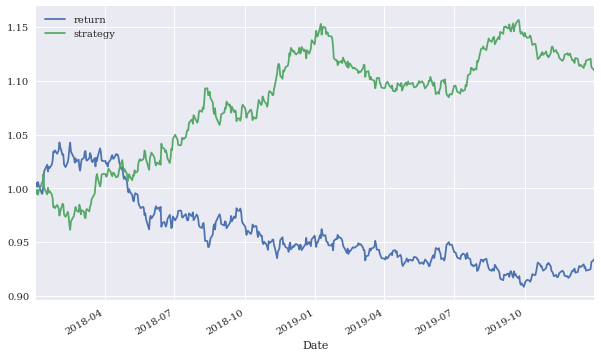

In [145]:
test_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

### Adding Different Type of Features

In [146]:
data['momentum'] = data['return'].rolling(5).mean().shift(1)

In [147]:
data['volatility'] = data['return'].rolling(20).std().shift(1)

In [148]:
data['distance'] = (data['price'] - 
                   data['price'].rolling(50).mean()).shift(1)

In [149]:
data.dropna(inplace=True)

In [150]:
cols.extend(['momentum', 'volatility', 'distance'])

In [151]:
print(data.round(4).tail())

             price  return  direction   lag_1   lag_2   lag_3   lag_4   lag_5  \
Date                                                                            
2019-12-24  1.1087  0.0001          1  0.0007 -0.0038  0.0008 -0.0034  0.0006   
2019-12-26  1.1096  0.0008          1  0.0001  0.0007 -0.0038  0.0008 -0.0034   
2019-12-27  1.1175  0.0071          1  0.0008  0.0001  0.0007 -0.0038  0.0008   
2019-12-30  1.1197  0.0020          1  0.0071  0.0008  0.0001  0.0007 -0.0038   
2019-12-31  1.1210  0.0012          1  0.0020  0.0071  0.0008  0.0001  0.0007   

            momentum  volatility  distance  
Date                                        
2019-12-24   -0.0010      0.0024    0.0005  
2019-12-26   -0.0011      0.0024    0.0004  
2019-12-27   -0.0003      0.0024    0.0012  
2019-12-30    0.0010      0.0028    0.0089  
2019-12-31    0.0021      0.0028    0.0110  


In [152]:
training_data = data[data.index < cutoff].copy()

In [153]:
mu, std = training_data.mean(), training_data.std()

In [154]:
training_data_ = (training_data - mu) / std

In [155]:
test_data = data[data.index >= cutoff].copy()

In [156]:
test_data_ = (test_data - mu) / std

In [157]:
set_seeds()
model = Sequential()
model.add(Dense(32, activation='relu',
               input_shape=(len(cols),)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [158]:
%%time
model.fit(training_data_[cols],
         training_data['direction'],
         epochs=25, verbose=False,
         validation_split=0.2, shuffle=False)

Wall time: 1.9 s


In [159]:
model.evaluate(training_data_[cols],
              training_data['direction'])

62/62 [==============================] - 0s 658us/step - loss: 0.6840 - accuracy: 0.5468


[0.6839503645896912, 0.5467552542686462]

In [160]:
pred = np.where(model.predict(training_data_[cols]) > 0.5, 1, 0)

In [161]:
training_data['prediction'] = np.where(pred > 0, 1, -1)

In [162]:
training_data['strategy'] = (training_data['prediction'] * training_data['return'])

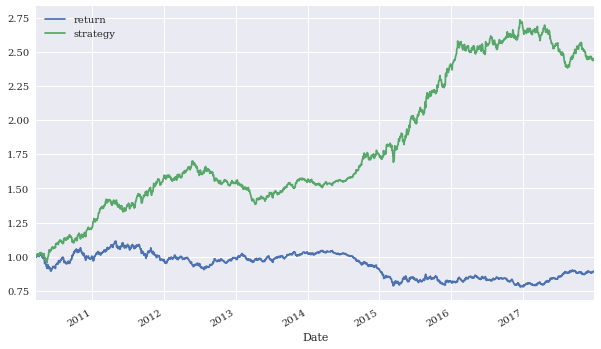

In [163]:
training_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))

In [164]:
model.evaluate(test_data_[cols], test_data['direction'])

16/16 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5189


[0.693461000919342, 0.5188866853713989]

In [165]:
pred = np.where(model.predict(test_data_[cols]) > 0.5, 1, 0)

In [166]:
test_data['prediction'] = np.where(pred > 0, 1, -1)

In [167]:
test_data['prediction'].value_counts()

-1    363
 1    140
Name: prediction, dtype: int64

In [168]:
test_data['strategy'] =  (test_data['prediction'] * test_data['return'])

In [169]:
test_data[['return','strategy']].sum().apply(np.exp)

return      0.934478
strategy    1.018640
dtype: float64

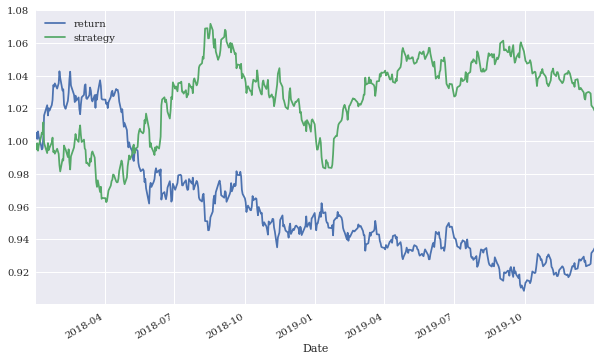

In [170]:
test_data[['return','strategy']].cumsum().apply(np.exp).plot(figsize=(10,6))